In [1]:
# plotting libraries
import matplotlib
import matplotlib.pyplot as plt 
# numpy (math) libary
import numpy as np
# csv reading library
import csv

In [2]:
###### CHIP L05C11 - P02 ######

path = 'data/'

###### FIRST STRUCTURE ANALYZED: S23, CROW (2 rings) resonator ######
# Read CSV files: structure 23
with open(path+'2017-10-04_deg14in14out_structure#23_wlen1520-1580.tsv', 'r') as fp1:
    reader = csv.reader(fp1, delimiter='\t', quotechar='"')
    full_scan = np.array([row for row in reader], dtype=float)
    
del reader

with open(path+'2017-10-04_deg14in14out_structure#23_wlen1525-1530.tsv', 'r') as fp2:
    reader = csv.reader(fp2, delimiter='\t', quotechar='"')
    scan1 = np.array([row for row in reader], dtype=float)
    
del reader

with open(path+'2017-10-04_deg14in14out_structure#23_wlen1542-1550.tsv', 'r') as fp3:
    reader = csv.reader(fp3, delimiter='\t', quotechar='"')
    scan2 = np.array([row for row in reader], dtype=float)
    
del reader

with open(path+'2017-10-04_deg14in14out_structure#23_wlen1562-1570.tsv', 'r') as fp4:
    reader = csv.reader(fp4, delimiter='\t', quotechar='"')
    scan3 = np.array([row for row in reader], dtype=float)
    
del reader

#with open(path+'2017-10-04_deg14in14out_loss#0_wlen1520-1580.tsv', 'r') as fp5:
#    reader = csv.reader(fp5, delimiter='\t', quotechar='"')
#    loss_full_scan = np.array([row for row in reader], dtype=float)
#    
#del reader

with open(path+'2017-10-04_deg14in14out_X2_wlen1520-1580.tsv', 'r') as fp4:
    reader = csv.reader(fp4, delimiter='\t', quotechar='"')
    loss_full_scan = np.array([row for row in reader], dtype=float)
    
del reader

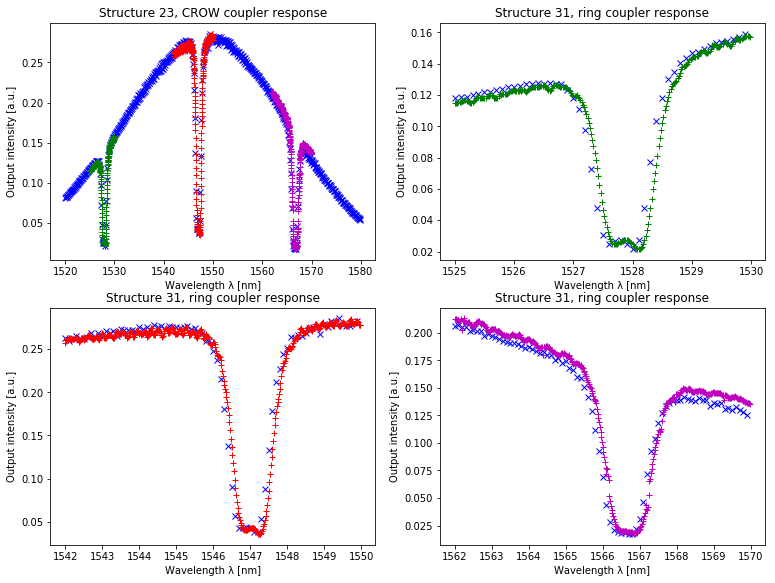

In [3]:
fig = plt.figure(figsize=(12.8, 9.6)) # default = 6.4, 4.8
ax1 = fig.add_subplot(221)
ax1.plot(full_scan[:,0], full_scan[:,1], 'bx')
ax1.plot(scan1[:,0], scan1[:,1], 'g+')
ax1.plot(scan2[:,0], scan2[:,1], 'r+')
ax1.plot(scan3[:,0], scan3[:,1], 'm+')

ax1.set_title('Structure 23, CROW coupler response')
ax1.set_xlabel('Wavelength λ [nm]')
ax1.set_ylabel('Output intensity [a.u.]')

ax2 = fig.add_subplot(222)
ax2.plot(full_scan[50:100,0], full_scan[50:100,1], 'bx')
ax2.plot(scan1[:,0], scan1[:,1], 'g+')

ax2.set_title('Structure 31, ring coupler response')
ax2.set_xlabel('Wavelength λ [nm]')
ax2.set_ylabel('Output intensity [a.u.]')

ax3 = fig.add_subplot(223)
ax3.plot(full_scan[220:300,0], full_scan[220:300,1], 'bx')
ax3.plot(scan2[:,0], scan2[:,1], 'r+')

ax3.set_title('Structure 31, ring coupler response')
ax3.set_xlabel('Wavelength λ [nm]')
ax3.set_ylabel('Output intensity [a.u.]')

ax4 = fig.add_subplot(224)
ax4.plot(full_scan[420:500,0], full_scan[420:500,1], 'bx')
ax4.plot(scan3[:,0], scan3[:,1], 'm+')

ax4.set_title('Structure 31, ring coupler response')
ax4.set_xlabel('Wavelength λ [nm]')
ax4.set_ylabel('Output intensity [a.u.]')

#fig.subplots_adjust(hspace=50)

plt.show()
plt.close()

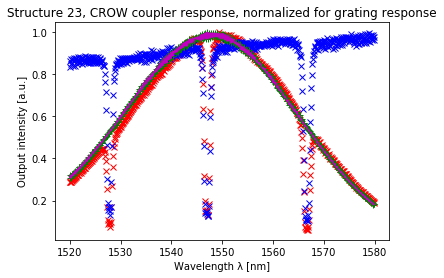

In [4]:
#normalization process
from scipy.interpolate import interp1d
x = np.array(loss_full_scan[:,0])
y = np.array(loss_full_scan[:,1])
f_grating = interp1d(x, y, kind='cubic')

fig = plt.figure()
ax1 = fig.add_subplot(111)
n1 = max(full_scan[:,1])
ax1.plot(full_scan[:,0], full_scan[:,1]/n1, 'rx')
n2 = max(full_scan[:,1]/loss_full_scan[:,1])
ax1.plot(loss_full_scan[:,0], full_scan[:,1]/loss_full_scan[:,1], 'bx')

n3 = max(loss_full_scan[:,1])
ax1.plot(loss_full_scan[:,0], loss_full_scan[:,1]/n3, 'g+')

n4 = max(f_grating(full_scan[:,0]))
ax1.plot(full_scan[:,0], f_grating(full_scan[:,0])/n4, color='m')

ax1.set_title('Structure 23, CROW coupler response, normalized for grating response')
ax1.set_xlabel('Wavelength λ [nm]')
ax1.set_ylabel('Output intensity [a.u.]')

plt.show()
plt.close()

In [5]:
def FWHM(y):
    # version 2
    max_y = max(y)  # Find the maximum y value
    min_y = min(y)  # Find the minimum y value
    #xs = [x for x in range(len(y)) if y[x] > max_y/2.0] # ver 1.0
    xs = [x for x in range(len(y)) if y[x] > max_y/2.0 + min_y/2.0] # ver 2.0
    return [min(xs), max(xs)]

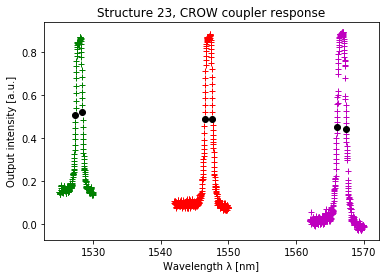

Quality factors:
λ =  1527.9  Quality factor Q =  [ 1469.13461538]
λ =  1547.05  Quality factor Q =  [ 1311.05932203]
λ =  1566.69  Quality factor Q =  [ 1135.2826087]


In [6]:
a = FWHM(1-scan1[:,1]/f_grating(scan1[:,0]))
b = FWHM(1-scan2[:,1]/f_grating(scan2[:,0]))
c = FWHM(1-scan3[:,1]/f_grating(scan3[:,0]))

fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax1.plot(full_scan[:,0], full_scan[:,1], 'bx')
ax1.plot(scan1[:,0], 1-scan1[:,1]/f_grating(scan1[:,0]), 'g+')
ax1.plot(scan1[a,0], 1-scan1[a,1]/f_grating(scan1[a,0]), 'ko')

ax1.plot(scan2[:,0], 1-scan2[:,1]/f_grating(scan2[:,0]), 'r+')
ax1.plot(scan2[b,0], 1-scan2[b,1]/f_grating(scan2[b,0]), 'ko')

ax1.plot(scan3[:,0], 1-scan3[:,1]/f_grating(scan3[:,0]), 'm+')
ax1.plot(scan3[c,0], 1-scan3[c,1]/f_grating(scan3[c,0]), 'ko')

ax1.set_title('Structure 23, CROW coupler response')
ax1.set_xlabel('Wavelength λ [nm]')
ax1.set_ylabel('Output intensity [a.u.]')

plt.show()
plt.close()

print('Quality factors:')
print('λ = ', np.mean(scan1[a,0]), ' Quality factor Q = ', np.mean(scan1[a,0])/np.diff(scan1[a,0]) )
print('λ = ', np.mean(scan2[b,0]), ' Quality factor Q = ', np.mean(scan2[b,0])/np.diff(scan2[b,0]) )
print('λ = ', np.mean(scan3[c,0]), ' Quality factor Q = ', np.mean(scan3[c,0])/np.diff(scan3[c,0]) )

In [7]:
###### SECOND STRUCTURE ANALYZED: S31, single ring resonator ######
# Read other CSV files: structure 31
with open(path+'2017-10-04_deg14in14out_structure#31_wlen1520-1580.tsv', 'r') as fp1:
    reader = csv.reader(fp1, delimiter='\t', quotechar='"')
    s31_full_scan = np.array([row for row in reader], dtype=float)
    
del reader

with open(path+'2017-10-04_deg14in14out_structure#31_wlen1522-1530.tsv', 'r') as fp2:
    reader = csv.reader(fp2, delimiter='\t', quotechar='"')
    s31_scan1 = np.array([row for row in reader], dtype=float)
    
del reader

with open(path+'2017-10-04_deg14in14out_structure#31_wlen1539-1547.tsv', 'r') as fp3:
    reader = csv.reader(fp3, delimiter='\t', quotechar='"')
    s31_scan2 = np.array([row for row in reader], dtype=float)
    
del reader

with open(path+'2017-10-04_deg14in14out_structure#31_wlen1557-1565_v2.tsv', 'r') as fp4:
    reader = csv.reader(fp4, delimiter='\t', quotechar='"')
    s31_scan3 = np.array([row for row in reader], dtype=float)
    
del reader

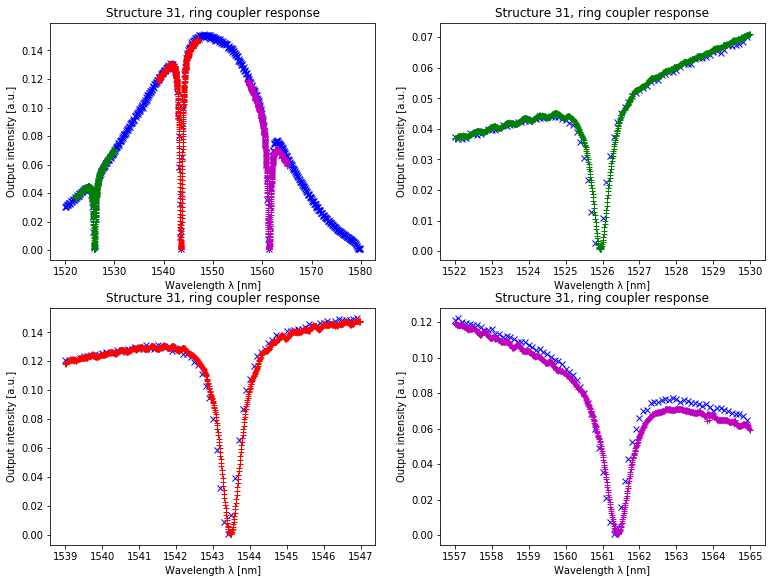

In [8]:
fig = plt.figure(figsize=(12.8, 9.6)) # default = 6.4, 4.8
ax1 = fig.add_subplot(221)
ax1.plot(s31_full_scan[:,0], s31_full_scan[:,1], 'bx')
ax1.plot(s31_scan1[:,0], s31_scan1[:,1], 'g+')
ax1.plot(s31_scan2[:,0], s31_scan2[:,1], 'r+')
ax1.plot(s31_scan3[:,0], s31_scan3[:,1], 'm+')

ax1.set_title('Structure 31, ring coupler response')
ax1.set_xlabel('Wavelength λ [nm]')
ax1.set_ylabel('Output intensity [a.u.]')

ax2 = fig.add_subplot(222)
ax2.plot(s31_full_scan[20:100,0], s31_full_scan[20:100,1], 'bx')
ax2.plot(s31_scan1[:,0], s31_scan1[:,1], 'g+')

ax2.set_title('Structure 31, ring coupler response')
ax2.set_xlabel('Wavelength λ [nm]')
ax2.set_ylabel('Output intensity [a.u.]')

ax3 = fig.add_subplot(223)
ax3.plot(s31_full_scan[190:270,0], s31_full_scan[190:270,1], 'bx')
ax3.plot(s31_scan2[:,0], s31_scan2[:,1], 'r+')

ax3.set_title('Structure 31, ring coupler response')
ax3.set_xlabel('Wavelength λ [nm]')
ax3.set_ylabel('Output intensity [a.u.]')

ax4 = fig.add_subplot(224)
ax4.plot(s31_full_scan[370:450,0], s31_full_scan[370:450,1], 'bx')
ax4.plot(s31_scan3[:,0], s31_scan3[:,1], 'm+')

ax4.set_title('Structure 31, ring coupler response')
ax4.set_xlabel('Wavelength λ [nm]')
ax4.set_ylabel('Output intensity [a.u.]')

#fig.subplots_adjust(hspace=50)

plt.show()
plt.close()

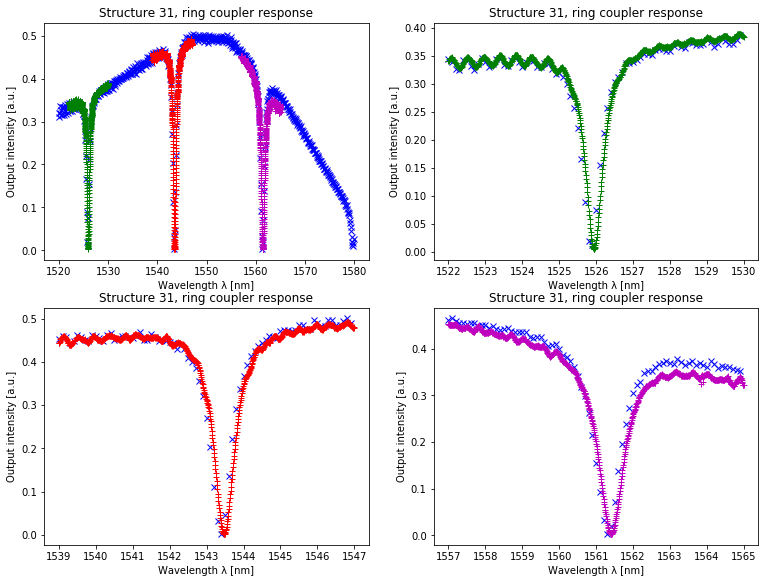

In [9]:
fig = plt.figure(figsize=(12.8, 9.6)) # default = 6.4, 4.8
ax1 = fig.add_subplot(221)
ax1.plot(s31_full_scan[:,0], s31_full_scan[:,1]/f_grating(s31_full_scan[:,0]), 'bx')
ax1.plot(s31_scan1[:,0], s31_scan1[:,1]/f_grating(s31_scan1[:,0]), 'g+')
ax1.plot(s31_scan2[:,0], s31_scan2[:,1]/f_grating(s31_scan2[:,0]), 'r+')
ax1.plot(s31_scan3[:,0], s31_scan3[:,1]/f_grating(s31_scan3[:,0]), 'm+')

ax1.set_title('Structure 31, ring coupler response')
ax1.set_xlabel('Wavelength λ [nm]')
ax1.set_ylabel('Output intensity [a.u.]')

ax2 = fig.add_subplot(222)
ax2.plot(s31_full_scan[20:100,0], s31_full_scan[20:100,1]/f_grating(s31_full_scan[20:100,0]), 'bx')
ax2.plot(s31_scan1[:,0], s31_scan1[:,1]/f_grating(s31_scan1[:,0]), 'g+')

ax2.set_title('Structure 31, ring coupler response')
ax2.set_xlabel('Wavelength λ [nm]')
ax2.set_ylabel('Output intensity [a.u.]')

ax3 = fig.add_subplot(223)
ax3.plot(s31_full_scan[190:270,0], s31_full_scan[190:270,1]/f_grating(s31_full_scan[190:270,0]), 'bx')
ax3.plot(s31_scan2[:,0], s31_scan2[:,1]/f_grating(s31_scan2[:,0]), 'r+')

ax3.set_title('Structure 31, ring coupler response')
ax3.set_xlabel('Wavelength λ [nm]')
ax3.set_ylabel('Output intensity [a.u.]')

ax4 = fig.add_subplot(224)
ax4.plot(s31_full_scan[370:450,0], s31_full_scan[370:450,1]/f_grating(s31_full_scan[370:450,0]), 'bx')
ax4.plot(s31_scan3[:,0], s31_scan3[:,1]/f_grating(s31_scan3[:,0]), 'm+')

ax4.set_title('Structure 31, ring coupler response')
ax4.set_xlabel('Wavelength λ [nm]')
ax4.set_ylabel('Output intensity [a.u.]')

#fig.subplots_adjust(hspace=50)

plt.show()
plt.close()

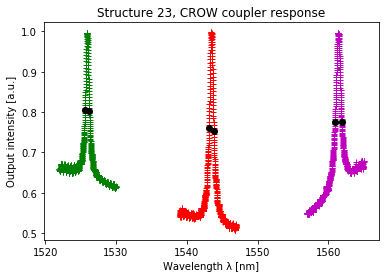

Quality factors:
λ =  1525.935  Quality factor Q =  [ 2501.53278689]
λ =  1543.48  Quality factor Q =  [ 2269.82352941]
λ =  1561.415  Quality factor Q =  [ 1643.59473684]


In [10]:
s31_a = FWHM(1-s31_scan1[:,1]/f_grating(s31_scan1[:,0]))
s31_b = FWHM(1-s31_scan2[:,1]/f_grating(s31_scan2[:,0]))
s31_c = FWHM(1-s31_scan3[:,1]/f_grating(s31_scan3[:,0]))

fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax1.plot(full_scan[:,0], full_scan[:,1], 'bx')
ax1.plot(s31_scan1[:,0], 1-s31_scan1[:,1]/f_grating(s31_scan1[:,0]), 'g+')
ax1.plot(s31_scan1[s31_a,0], 1-s31_scan1[s31_a,1]/f_grating(s31_scan1[s31_a,0]), 'ko')

ax1.plot(s31_scan2[:,0], 1-s31_scan2[:,1]/f_grating(s31_scan2[:,0]), 'r+')
ax1.plot(s31_scan2[s31_b,0], 1-s31_scan2[s31_b,1]/f_grating(s31_scan2[s31_b,0]), 'ko')

ax1.plot(s31_scan3[:,0], 1-s31_scan3[:,1]/f_grating(s31_scan3[:,0]), 'm+')
ax1.plot(s31_scan3[s31_c,0], 1-s31_scan3[s31_c,1]/f_grating(s31_scan3[s31_c,0]), 'ko')

ax1.set_title('Structure 23, CROW coupler response')
ax1.set_xlabel('Wavelength λ [nm]')
ax1.set_ylabel('Output intensity [a.u.]')

plt.show()
plt.close()

print('Quality factors:')
print('λ = ', np.mean(s31_scan1[s31_a,0]), ' Quality factor Q = ', np.mean(s31_scan1[s31_a,0])/np.diff(s31_scan1[s31_a,0]) )
print('λ = ', np.mean(s31_scan2[s31_b,0]), ' Quality factor Q = ', np.mean(s31_scan2[s31_b,0])/np.diff(s31_scan2[s31_b,0]) )
print('λ = ', np.mean(s31_scan3[s31_c,0]), ' Quality factor Q = ', np.mean(s31_scan3[s31_c,0])/np.diff(s31_scan3[s31_c,0]) )

In [14]:
###### THIRD STRUCTURE ANALYZED: S55, CROW (2 rings) resonator ######
# Read other CSV files: structure 55 (column 4)
with open(path+'2017-10-05_deg14in14out_structure#55_wlen1520-1580_lowG.tsv', 'r') as fp1:
    reader = csv.reader(fp1, delimiter='\t', quotechar='"')
    s55_full_scan = np.array([row for row in reader], dtype=float)
    
del reader

with open(path+'2017-10-05_deg14in14out_structure#55_wlen1525-1533_lowG.tsv', 'r') as fp2:
    reader = csv.reader(fp2, delimiter='\t', quotechar='"')
    s55_scan1 = np.array([row for row in reader], dtype=float)
    
del reader

with open(path+'2017-10-05_deg14in14out_structure#55_wlen1543-1551_lowG.tsv', 'r') as fp3:
    reader = csv.reader(fp3, delimiter='\t', quotechar='"')
    s55_scan2 = np.array([row for row in reader], dtype=float)
    
del reader

with open(path+'2017-10-05_deg14in14out_structure#55_wlen1563-1571_lowG.tsv', 'r') as fp4:
    reader = csv.reader(fp4, delimiter='\t', quotechar='"')
    s55_scan3 = np.array([row for row in reader], dtype=float)
    
del reader

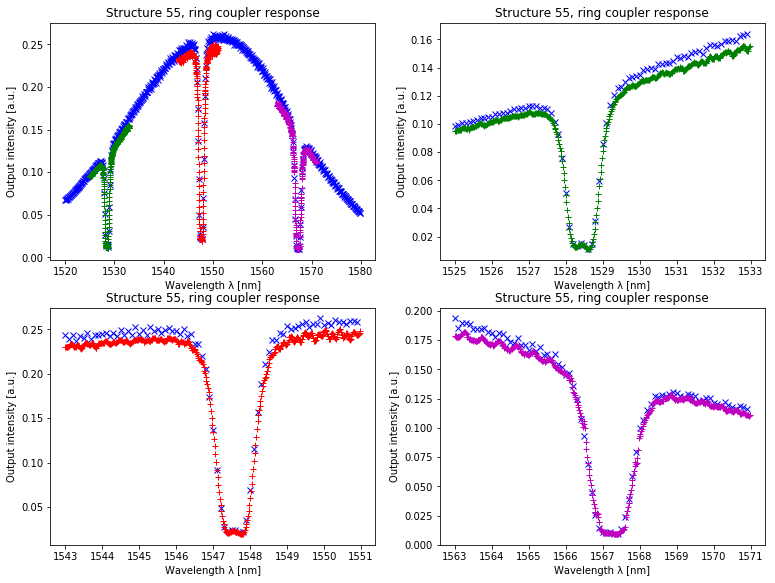

In [17]:
fig = plt.figure(figsize=(12.8, 9.6)) # default = 6.4, 4.8
ax1 = fig.add_subplot(221)
ax1.plot(s55_full_scan[:,0], s55_full_scan[:,1], 'bx')
ax1.plot(s55_scan1[:,0], s55_scan1[:,1], 'g+')
ax1.plot(s55_scan2[:,0], s55_scan2[:,1], 'r+')
ax1.plot(s55_scan3[:,0], s55_scan3[:,1], 'm+')

ax1.set_title('Structure 55, ring coupler response')
ax1.set_xlabel('Wavelength λ [nm]')
ax1.set_ylabel('Output intensity [a.u.]')

ax2 = fig.add_subplot(222)
ax2.plot(s55_full_scan[50:130,0], s55_full_scan[50:130,1], 'bx')
ax2.plot(s55_scan1[:,0], s55_scan1[:,1], 'g+')

ax2.set_title('Structure 55, ring coupler response')
ax2.set_xlabel('Wavelength λ [nm]')
ax2.set_ylabel('Output intensity [a.u.]')

ax3 = fig.add_subplot(223)
ax3.plot(s55_full_scan[230:310,0], s55_full_scan[230:310,1], 'bx')
ax3.plot(s55_scan2[:,0], s55_scan2[:,1], 'r+')

ax3.set_title('Structure 55, ring coupler response')
ax3.set_xlabel('Wavelength λ [nm]')
ax3.set_ylabel('Output intensity [a.u.]')

ax4 = fig.add_subplot(224)
ax4.plot(s55_full_scan[430:510,0], s55_full_scan[430:510,1], 'bx')
ax4.plot(s55_scan3[:,0], s55_scan3[:,1], 'm+')

ax4.set_title('Structure 55, ring coupler response')
ax4.set_xlabel('Wavelength λ [nm]')
ax4.set_ylabel('Output intensity [a.u.]')

plt.show()
plt.close()

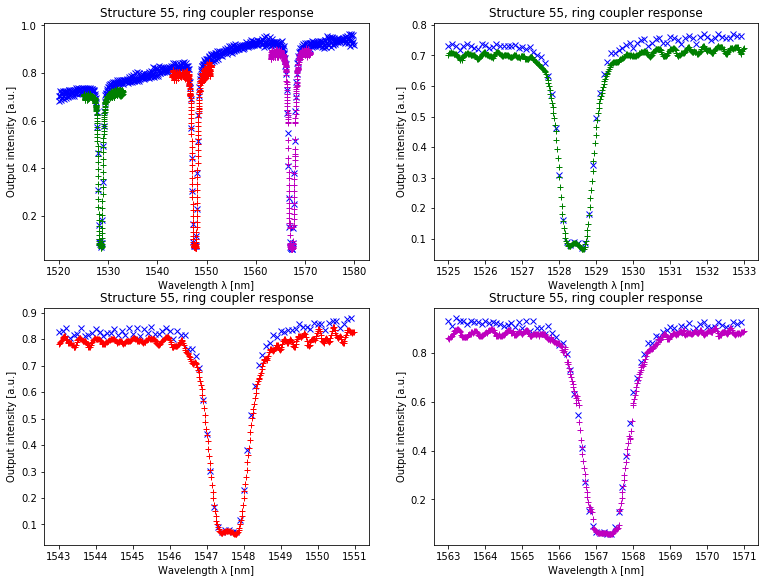

In [18]:
fig = plt.figure(figsize=(12.8, 9.6)) # default = 6.4, 4.8
ax1 = fig.add_subplot(221)
ax1.plot(s55_full_scan[:,0], s55_full_scan[:,1]/f_grating(s55_full_scan[:,0]), 'bx')
ax1.plot(s55_scan1[:,0], s55_scan1[:,1]/f_grating(s55_scan1[:,0]), 'g+')
ax1.plot(s55_scan2[:,0], s55_scan2[:,1]/f_grating(s55_scan2[:,0]), 'r+')
ax1.plot(s55_scan3[:,0], s55_scan3[:,1]/f_grating(s55_scan3[:,0]), 'm+')

ax1.set_title('Structure 55, ring coupler response')
ax1.set_xlabel('Wavelength λ [nm]')
ax1.set_ylabel('Output intensity [a.u.]')

ax2 = fig.add_subplot(222)
ax2.plot(s55_full_scan[50:130,0], s55_full_scan[50:130,1]/f_grating(s55_full_scan[50:130,0]), 'bx')
ax2.plot(s55_scan1[:,0], s55_scan1[:,1]/f_grating(s55_scan1[:,0]), 'g+')

ax2.set_title('Structure 55, ring coupler response')
ax2.set_xlabel('Wavelength λ [nm]')
ax2.set_ylabel('Output intensity [a.u.]')

ax3 = fig.add_subplot(223)
ax3.plot(s55_full_scan[230:310,0], s55_full_scan[230:310,1]/f_grating(s55_full_scan[230:310,0]), 'bx')
ax3.plot(s55_scan2[:,0], s55_scan2[:,1]/f_grating(s55_scan2[:,0]), 'r+')

ax3.set_title('Structure 55, ring coupler response')
ax3.set_xlabel('Wavelength λ [nm]')
ax3.set_ylabel('Output intensity [a.u.]')

ax4 = fig.add_subplot(224)
ax4.plot(s55_full_scan[430:510,0], s55_full_scan[430:510,1]/f_grating(s55_full_scan[430:510,0]), 'bx')
ax4.plot(s55_scan3[:,0], s55_scan3[:,1]/f_grating(s55_scan3[:,0]), 'm+')

ax4.set_title('Structure 55, ring coupler response')
ax4.set_xlabel('Wavelength λ [nm]')
ax4.set_ylabel('Output intensity [a.u.]')

plt.show()
plt.close()

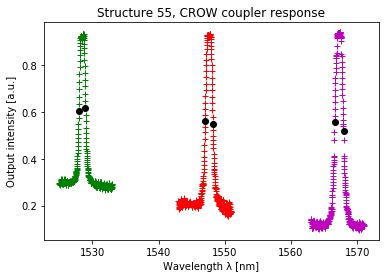

Quality factors:
λ =  1528.44  Quality factor Q =  [ 1528.44]
λ =  1547.59  Quality factor Q =  [ 1311.51694915]
λ =  1567.26  Quality factor Q =  [ 1152.39705882]


In [19]:
s55_a = FWHM(1-s55_scan1[:,1]/f_grating(s55_scan1[:,0]))
s55_b = FWHM(1-s55_scan2[:,1]/f_grating(s55_scan2[:,0]))
s55_c = FWHM(1-s55_scan3[:,1]/f_grating(s55_scan3[:,0]))

fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax1.plot(full_scan[:,0], full_scan[:,1], 'bx')
ax1.plot(s55_scan1[:,0], 1-s55_scan1[:,1]/f_grating(s55_scan1[:,0]), 'g+')
ax1.plot(s55_scan1[s55_a,0], 1-s55_scan1[s55_a,1]/f_grating(s55_scan1[s55_a,0]), 'ko')

ax1.plot(s55_scan2[:,0], 1-s55_scan2[:,1]/f_grating(s55_scan2[:,0]), 'r+')
ax1.plot(s55_scan2[s55_b,0], 1-s55_scan2[s55_b,1]/f_grating(s55_scan2[s55_b,0]), 'ko')

ax1.plot(s55_scan3[:,0], 1-s55_scan3[:,1]/f_grating(s55_scan3[:,0]), 'm+')
ax1.plot(s55_scan3[s55_c,0], 1-s55_scan3[s55_c,1]/f_grating(s55_scan3[s55_c,0]), 'ko')

ax1.set_title('Structure 55, CROW coupler response')
ax1.set_xlabel('Wavelength λ [nm]')
ax1.set_ylabel('Output intensity [a.u.]')

plt.show()
plt.close()

print('Quality factors:')
print('λ = ', np.mean(s55_scan1[s55_a,0]), ' Quality factor Q = ', np.mean(s55_scan1[s55_a,0])/np.diff(s55_scan1[s55_a,0]) )
print('λ = ', np.mean(s55_scan2[s55_b,0]), ' Quality factor Q = ', np.mean(s55_scan2[s55_b,0])/np.diff(s55_scan2[s55_b,0]) )
print('λ = ', np.mean(s55_scan3[s55_c,0]), ' Quality factor Q = ', np.mean(s55_scan3[s55_c,0])/np.diff(s55_scan3[s55_c,0]) )